In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Problem Statement¶


* we have to  Build a model which predicts more sales based on the money spent on different platforms for marketing 

In [3]:
df = pd.read_csv("advertisingdata.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data understanding

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df['TV'].value_counts()

TV
199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: count, Length: 190, dtype: int64

In [8]:
df['TV'].unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

In [9]:
df['TV'].unique().sum()

27745.9

In [10]:
df["Radio"].value_counts()

Radio
4.1     3
5.7     3
13.9    2
14.3    2
36.9    2
       ..
42.8    1
14.5    1
30.6    1
33.0    1
8.6     1
Name: count, Length: 167, dtype: int64

In [11]:
df["Radio"].unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

In [12]:
df["Radio"].unique().sum()

3959.9999999999995

In [13]:
df["Sales"].value_counts()

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

In [14]:
df["Sales"].unique()

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 17.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 16.1, 10.6, 23.2,
       19.8, 16.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1,
       24.2, 14. , 16. , 11. , 13.4, 22.3, 18.3, 12.4,  8.8,  8.7,  6.9,
       14.2,  5.3, 17.3, 13.6, 21.7, 12.9, 16.7,  7.3, 19.4, 22.2, 11.5,
       16.9, 17.2, 19.7, 21.8, 12.2,  9.4, 15.9,  6.6, 15.5,  7. , 15.2,
       24.7,  1.6, 17.7,  5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 10.9,
       19.2, 20.1, 12.3, 10.3, 18.2, 20.6,  3.2, 15.3, 13.3, 19.9,  8. ,
       20. ,  8.4,  7.6, 27. , 16.8, 17.6, 26.2,  6.7,  5.9, 14.8, 25.5])

In [15]:
df["Sales"].unique().sum()

1823.1

In [16]:
df["Newspaper"].value_counts()

Newspaper
9.3     3
25.6    3
8.7     3
34.6    2
8.5     2
       ..
27.2    1
31.7    1
19.3    1
31.3    1
66.2    1
Name: count, Length: 172, dtype: int64

In [17]:
df["Newspaper"].unique()

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  49.6,  26.2,  19.5,  12.6,  22.9,  40.8,
        43.2,  38.6,  30. ,   0.3,   7.4,   8.5,   5. ,  45.7,  35.1,
        32. ,  31.6,  38.7,   1.8,  26.4,  43.3,  31.5,  35.7,  18.5,
        49.9,  36.8,  34.6,   3.6,  39.6,  58.7,  15.9,  60. ,  41.4,
        16.6,  37.7,   9.3,  21.4,  54.7,  27.3,   8.4,  28.9,   0.9,
         2.2,  10.2,  11. ,  27.2,  31.7,  19.3,  31.3,  13.1,  89.4,
        20.7,  14.2,   9.4,  23.1,  22.3,  36.9,  32.5,  35.6,  33.8,
        65.7,  16. ,  63.2,  73.4,  51.4,  33. ,  59. ,  72.3,  10.9,
         5.9,  22. ,  51.2,  45.9,  49.8, 100.9,  17.9,   5.3,  29.7,
        23.2,  25.6,   5.5,  56.5,   2.4,  10.7,  34.5,  52.7,  14.8,
        79.2,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,  50.6,   9.2,
         3.2,  43.1,   8.7,  43. ,   2.1,  65.6,  59.7,  20.5,   1.7,
        12.9,  75.6,

In [18]:
df["Newspaper"].unique().sum()

5473.5

In [19]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

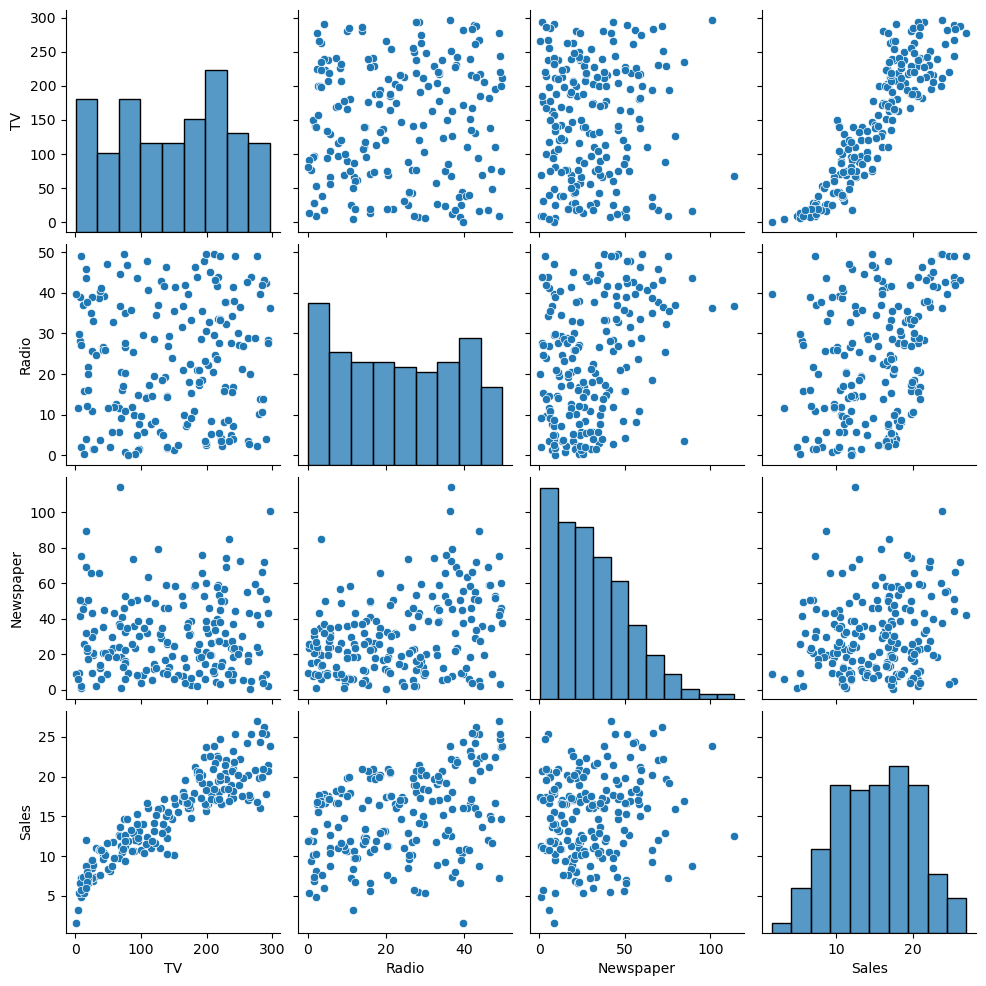

In [21]:
sns.pairplot(data = df)
plt.show()

# from the pair plot i have observed that the Tv and the sales having the highly correlation 

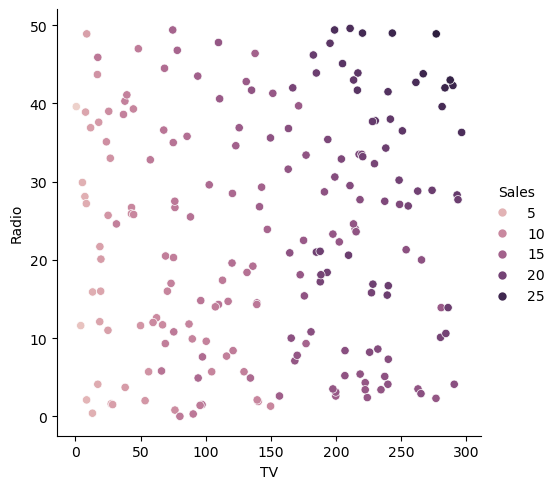

In [22]:
sns.relplot(x= df["TV"],y=df["Radio"],hue = df['Sales'])
plt.show()

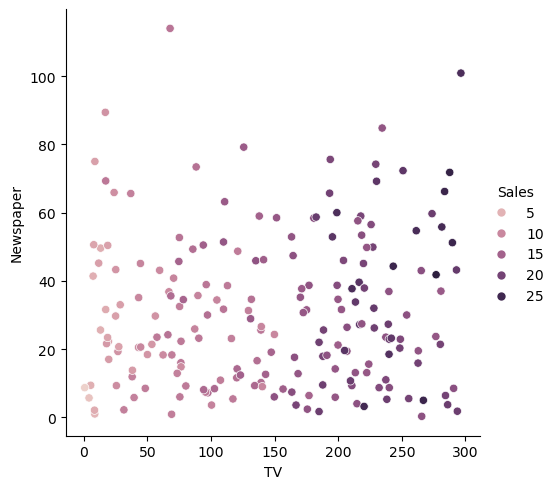

In [23]:
sns.relplot(x= df["TV"],y=df["Newspaper"],hue = df['Sales'])
plt.show()

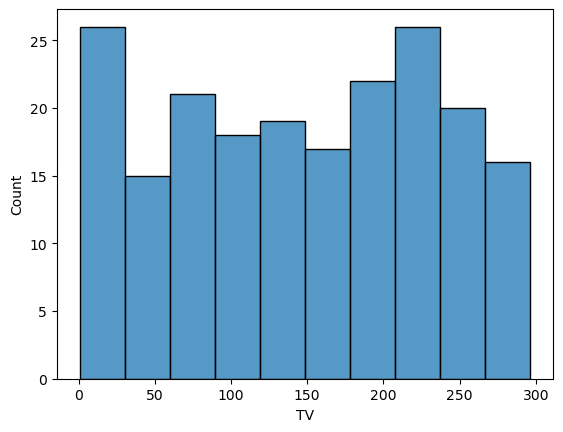

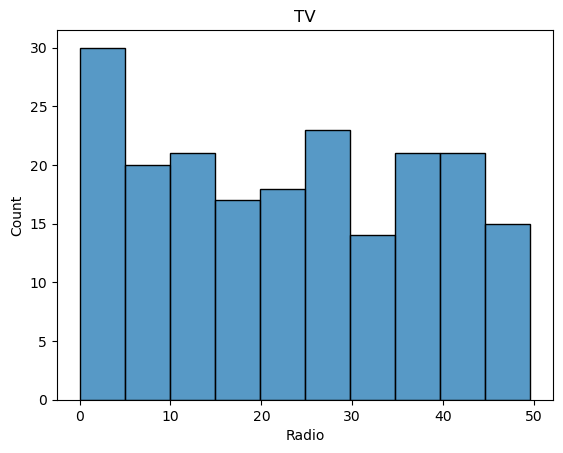

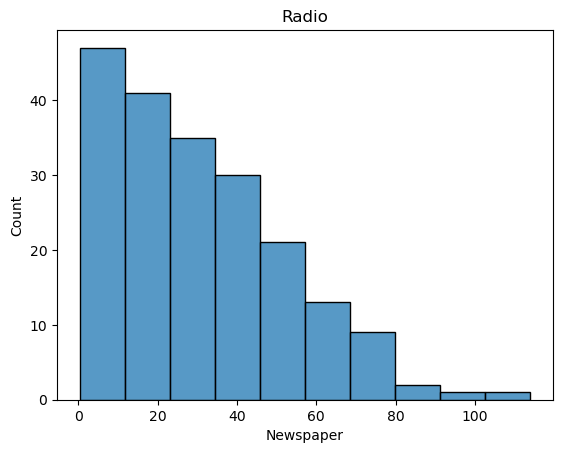

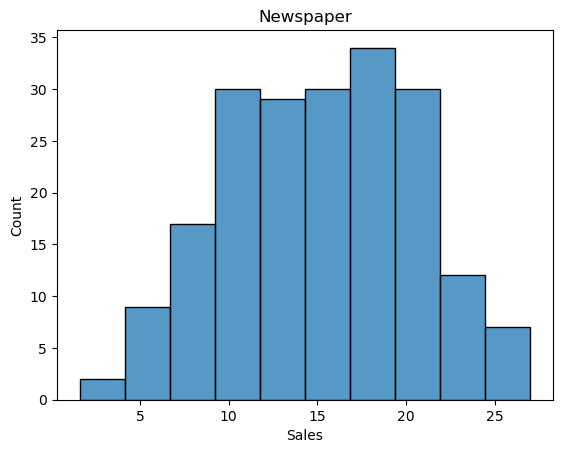

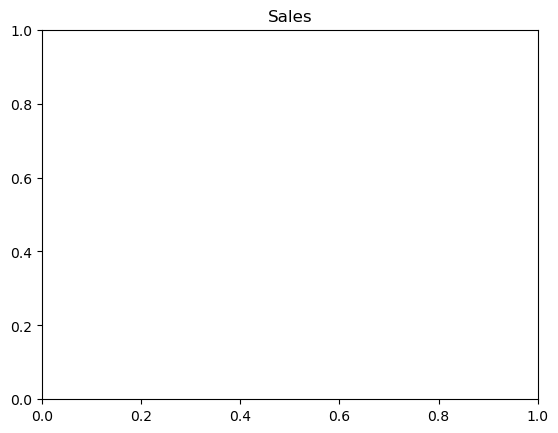

In [24]:
for i in df:
    sns.histplot(df[i],bins = 10)
    plt.show()
    plt.title(i)

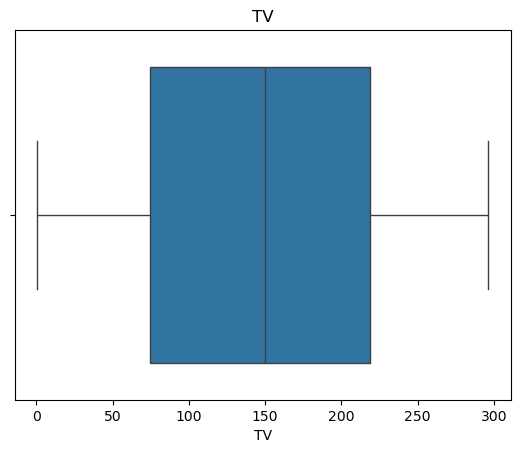

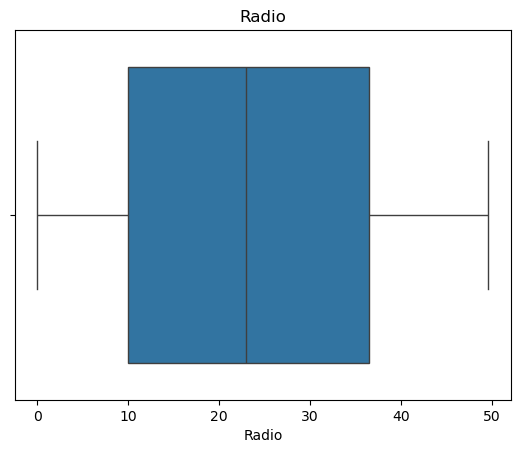

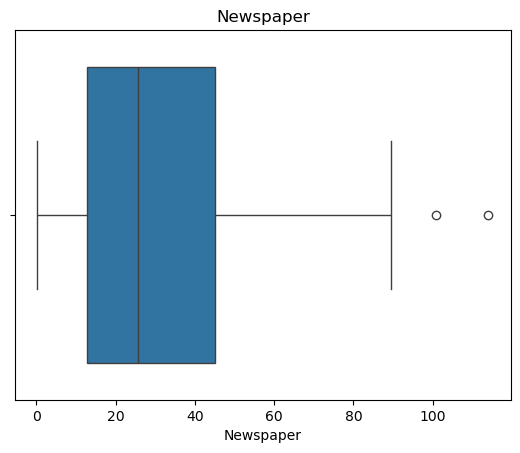

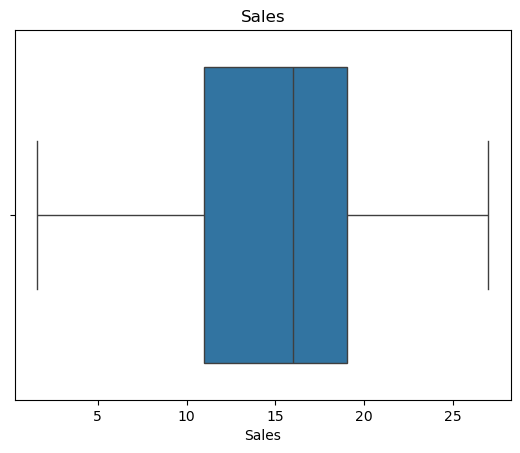

In [25]:
for i in df:
    sns.boxplot(x= df[i])
    plt.title(i)
    plt.show()

# from above i have obsereved that the newspaper having the outliers

In [45]:
sri = df.corr()
sri

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


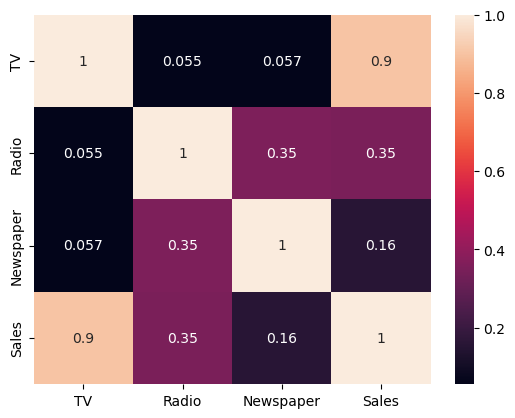

In [46]:
sns.heatmap(sri,annot=True)
plt.show()

# from above the TV have the strongly correlation with the sales and the Newspaper have the less correlation with sales

# Data Preprocessing

* data cleaning

In [26]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# typecasting of the data types

In [27]:
df['TV'] = df["TV"].astype(float)

In [28]:
df["Radio"] = df["Radio"].astype(float)

In [29]:
df["Newspaper"]  = df["Newspaper"].astype(float)

In [30]:
df["Sales"] = df["Sales"].astype(float)

In [31]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Handling with the null values

In [32]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Handling with the duplicates

In [33]:
df.duplicated().sum()

0

In [34]:
df[df.duplicated()]

,TV,Radio,Newspaper,Sales


In [35]:
df[~df.duplicated()]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Dealing with the outliers

In [38]:
q1  = df["Newspaper"].quantile(0.25)
q2= df["Newspaper"].quantile(0.5)
q3 = df["Newspaper"].quantile(0.75)
IQR = q3 - q1
print("q1:",q1)
print("q2:",q2)
print("q3:",q3)
print("IQR:",IQR)

q1: 12.75
q2: 25.75
q3: 45.1
IQR: 32.35


In [40]:
lower_limit = q1 - (IQR*1.5)
upper_limit = q3 + (IQR*1.5)

In [43]:
df[(df["Newspaper"] < lower_limit) | (df["Newspaper"] >upper_limit)]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


* where is a possibility of spending the more amount on the newspaper so i am not doing any modification

In [50]:
df.to_csv("Sales prediction cleaned dataset.csv",index = False)